In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import glob
import os

## Retrieve All Masked Samples Reads

In [6]:
masked_list = []

for file in glob.glob("*.tsv"):
    filename = os.path.basename(file)
    df = pd.read_csv(file, comment  = '#', sep = '\t')
    df['sampleName'] = filename.split('.startsite.tsv')[0]
    df = df.drop('MSD_T',1)
    df = df.rename(columns=df.iloc[1])
    df = df.drop(df.index[0:2],0)
    df.set_axis([*df.columns[:-1], 'Sample_Name'], axis=1, inplace=True)
    df['Freq'] = df['Freq'].astype('float64')
    masked_list.append(df)

## Retrieve All Unmasked Sample Reads

In [7]:
unmasked_list = []

for file in glob.glob('**/*.tsv'):
    filename = os.path.basename(file)
    df = pd.read_csv(file, comment  = '#', sep = '\t')
    df['sampleName'] = filename.split('.startsite.tsv')[0]
    df = df.drop('MSD_T',1)
    df = df.rename(columns=df.iloc[1])
    df = df.drop(df.index[0:2],0)
    df.set_axis([*df.columns[:-1], 'Sample_Name'], axis=1, inplace=True)
    df['Freq'] = df['Freq'].astype('float64')
    unmasked_list.append(df)

In [ ]:
for i in masked_list:
    masked_list[i]
    
x = unmasked_list[1].groupby('Base')['Freq'].mean()
y = masked_list[1].groupby('Base')['Freq'].mean()
x = x.to_frame()
y = y.to_frame()
x.reset_index(inplace = True)
y.reset_index(inplace = True)

X_axis = np.arange(4)


plt.bar(X_axis - 0.2, x['Freq'], 0.4, label = 'Unmasked')
plt.bar(X_axis + 0.2, y['Freq'], 0.4, label = 'Masked')

## Concat the lists to make two large dataframes

Masked is all the dataframes from masked list, concatenated into one df

Same with unmasked

In [16]:
masked = pd.concat(masked_list)
unmasked = pd.concat(unmasked_list)

## PLOT IT BABY

In [20]:
mask = masked.groupby('Base')['Freq'].mean()
unmask = unmasked.groupby('Base')['Freq'].mean()

mask = mask.to_frame()
unmask = unmask.to_frame()

mask.reset_index(inplace = True)
unmask.reset_index(inplace = True)

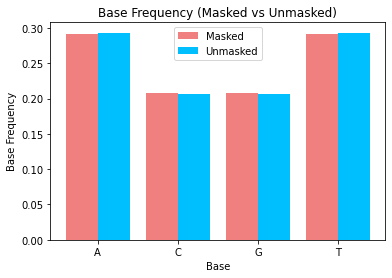

In [24]:
x_axis = np.arange(4)

plt.bar(x_axis - 0.2, mask['Freq'], 0.4, label = 'Masked', color = 'lightcoral')
plt.bar(x_axis + 0.2, unmask['Freq'], 0.4, label = 'Unmasked', color = 'deepskyblue')
plt.xticks(x_axis, mask['Base'])
plt.xlabel("Base")
plt.ylabel("Base Frequency")
plt.title("Base Frequency (Masked vs Unmasked)")
plt.legend()